In [2]:
import sys
sys.path.append('../')

from envs.GridMaps import *
from utilities.transitionDatasetGeneration import *

In [6]:
maze = maze14x14["maze"]
# Folder containing your saved models
folder_name = 'proeba'

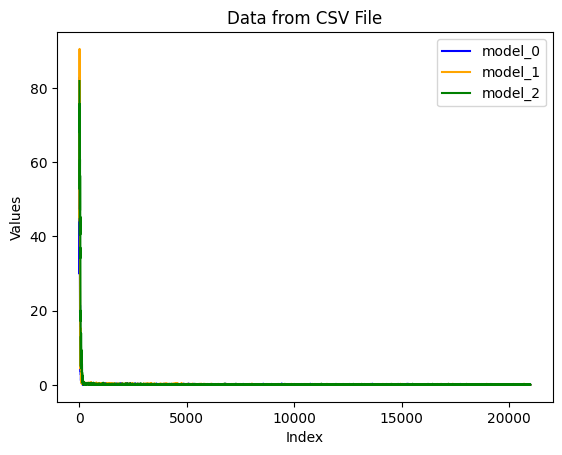

In [7]:
plot_train_losses(folder_name)
plot_val_losses(folder_name)

In [ ]:
models_arr = load_models(folder_name)

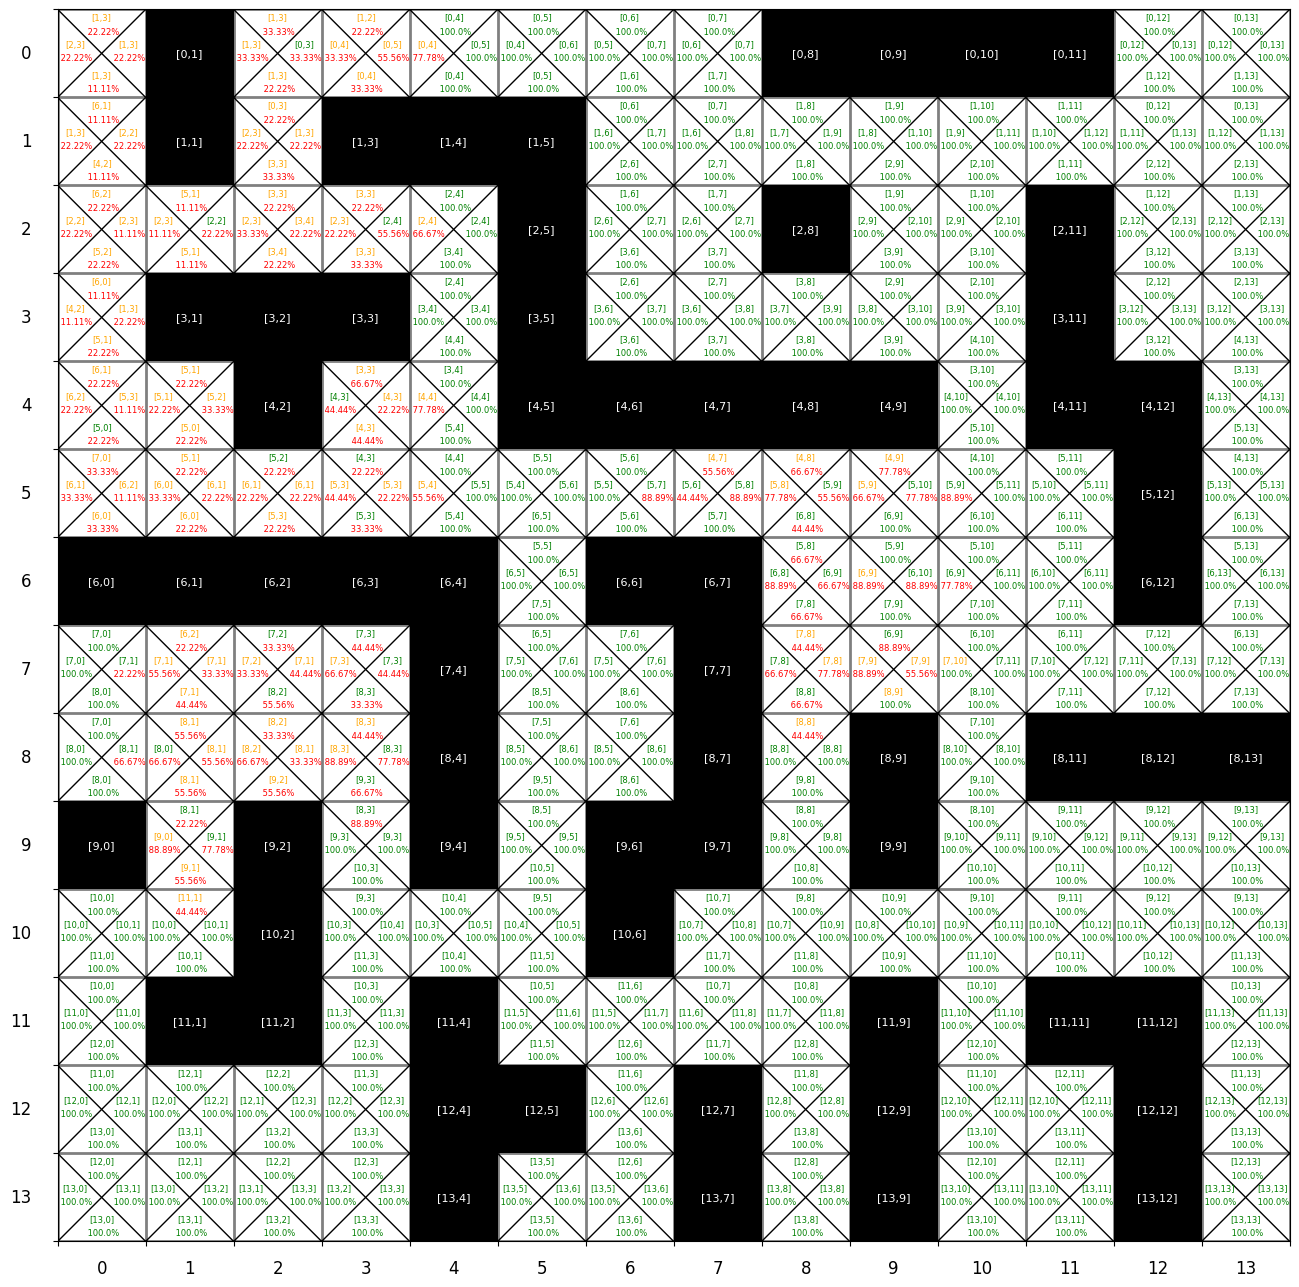

In [3]:
probMapper(maze, models_arr, threshold=90.0)

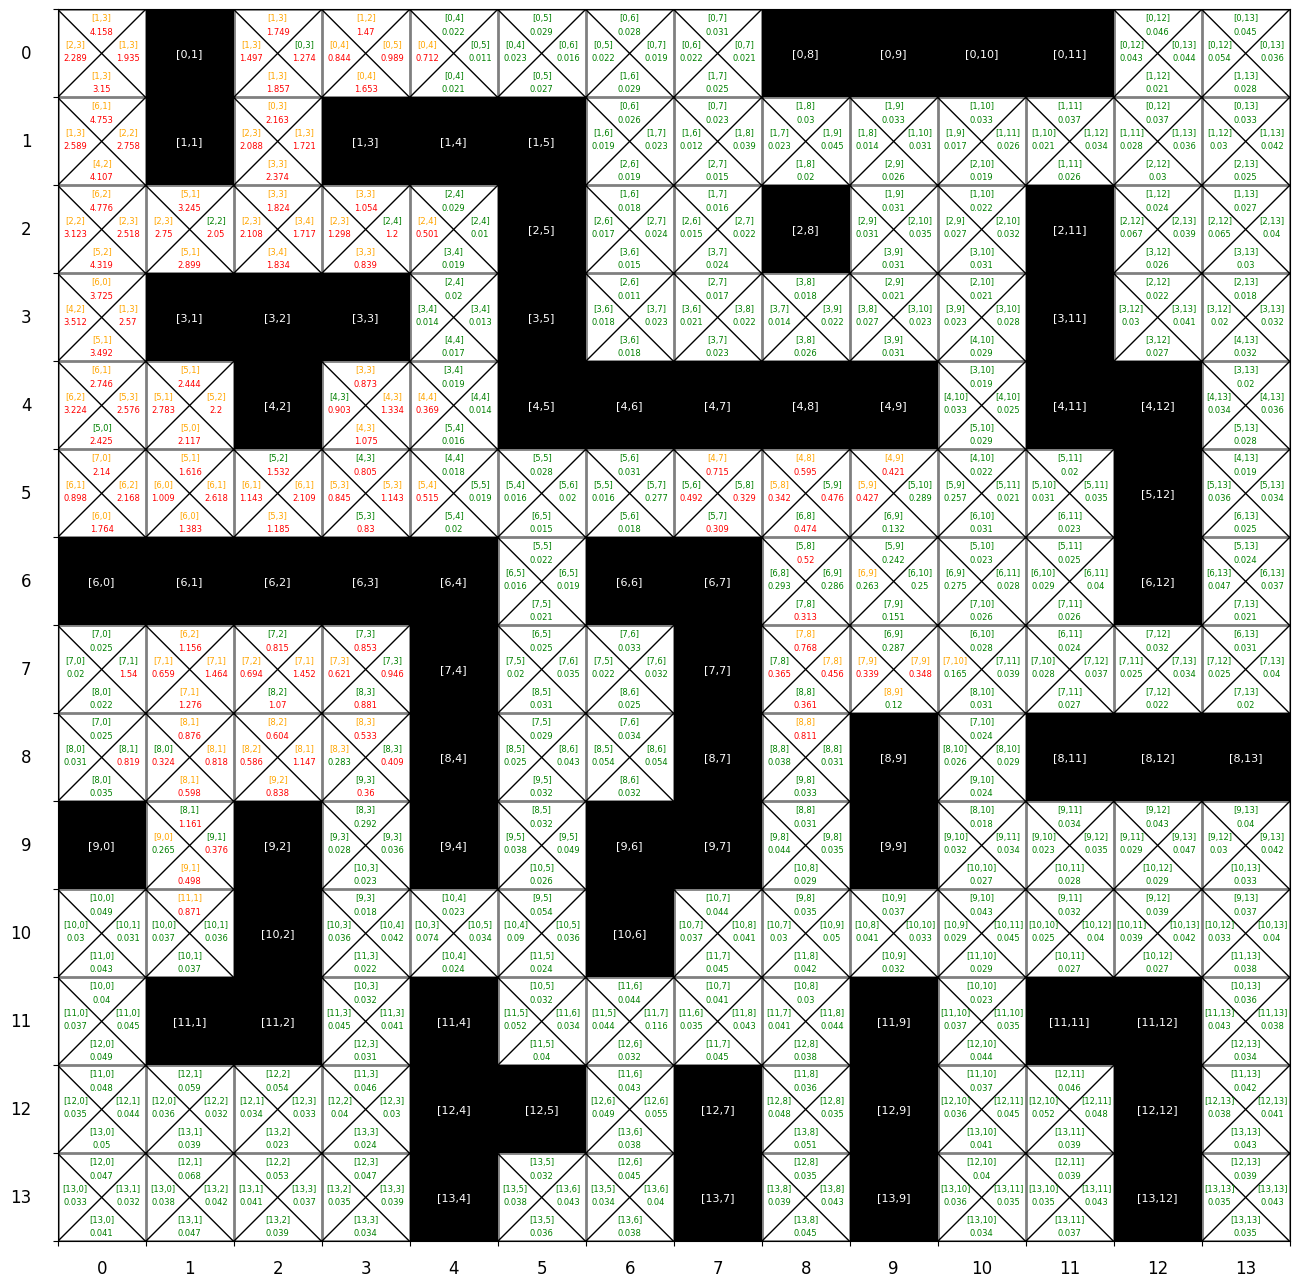

In [4]:
stdMapper(maze, models_arr, threshold=0.3)

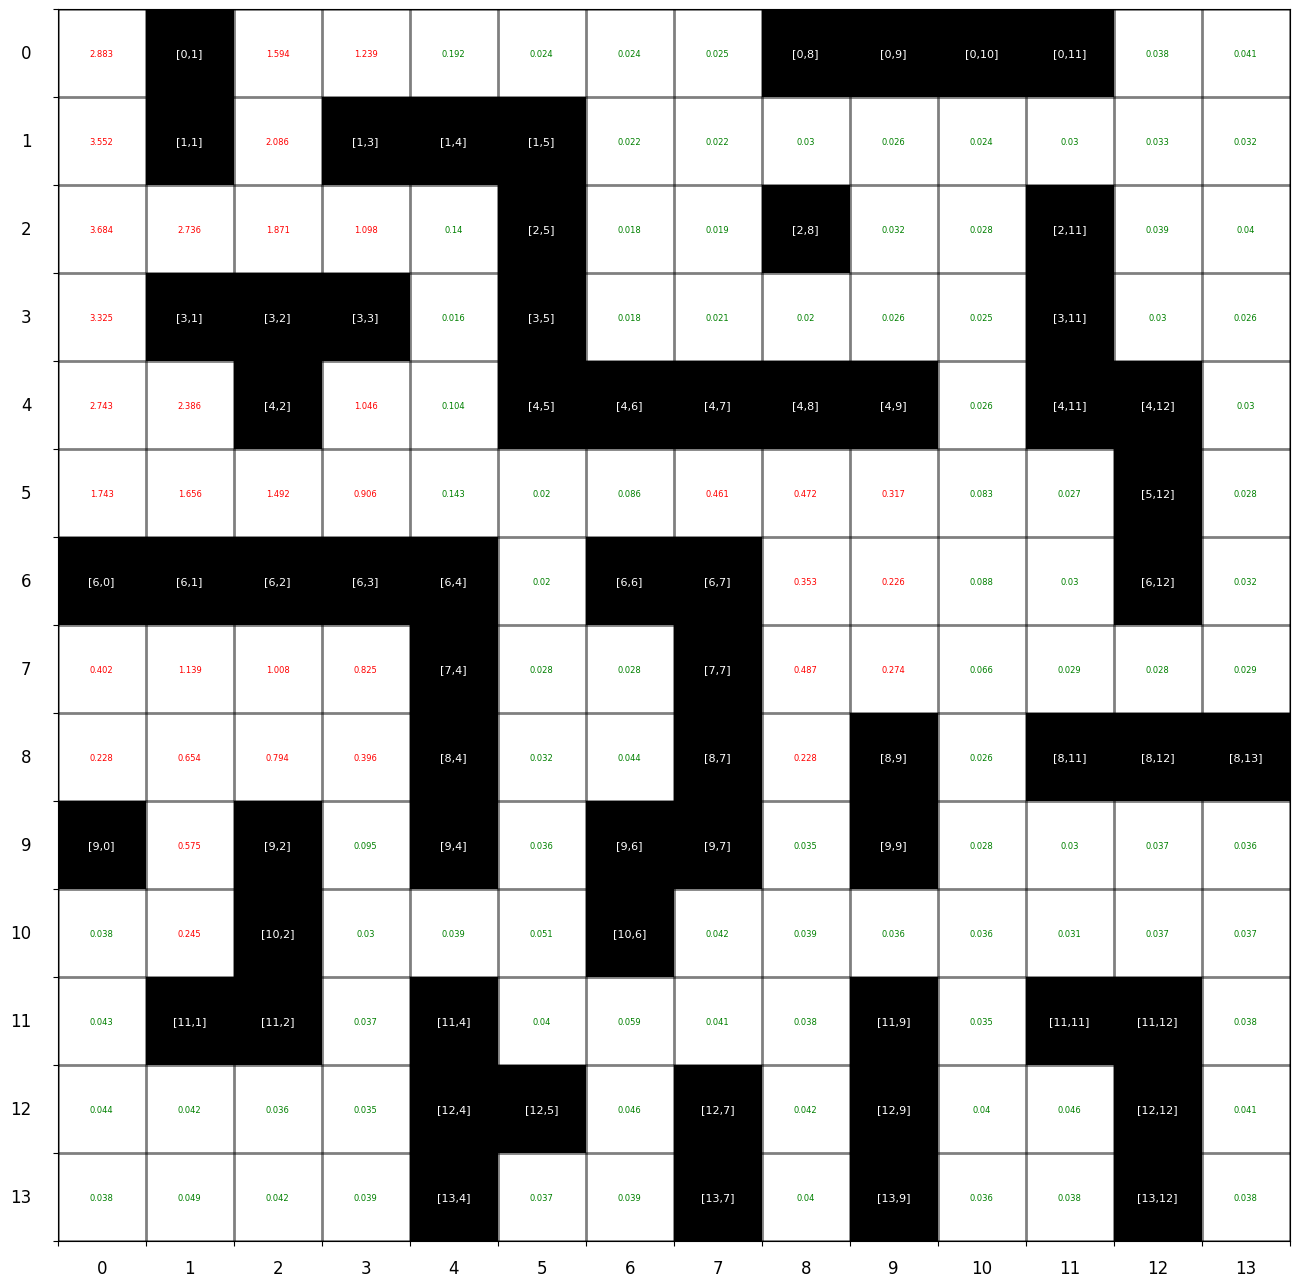

In [6]:
stdMeanMapper(maze, models_arr, threshold=0.2)